In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import random
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
train_df = pd.read_csv("./train.csv", 
                     parse_dates=[ 'pickup_datetime'], 
                     date_parser=dateparse)
# adding weekday and hour fields for easy grouping
train_df['pickup_day'] = train_df['pickup_datetime'].apply(lambda x: x.weekday())
#train_df['pickup_hour'] = train_df['pickup_datetime'].apply(lambda x: x.hour* 60 + x.minute)
train_df['pickup_hour'] = train_df['pickup_datetime'].apply(lambda x:x.hour)

#train_df["pickup_hour"] = train_df["pickup_hour"].apply(lambda x : )
#train_df = pd.read_csv("./train.csv")

In [ ]:
train_df["pickup_hour"].plot(kind = "bar")

In [3]:
train_df["pickup_longitude"] = (train_df["pickup_longitude"]  -train_df["pickup_longitude"].mean())/train_df["pickup_longitude"].std() 

In [5]:
train_df["pickup_latitude"] = (train_df["pickup_latitude"]  -train_df["pickup_latitude"].mean())/train_df["pickup_latitude"].std() 

In [6]:
#expand
train_df["pickup_longitude"] *= 100
train_df["pickup_latitude"] *= 100

In [9]:
new_df = train_df.filter(["pickup_latitude", "pickup_longitude", "pickup_hour", "pickup_day"], axis = 1)

In [10]:
new_df = new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis = 1)]

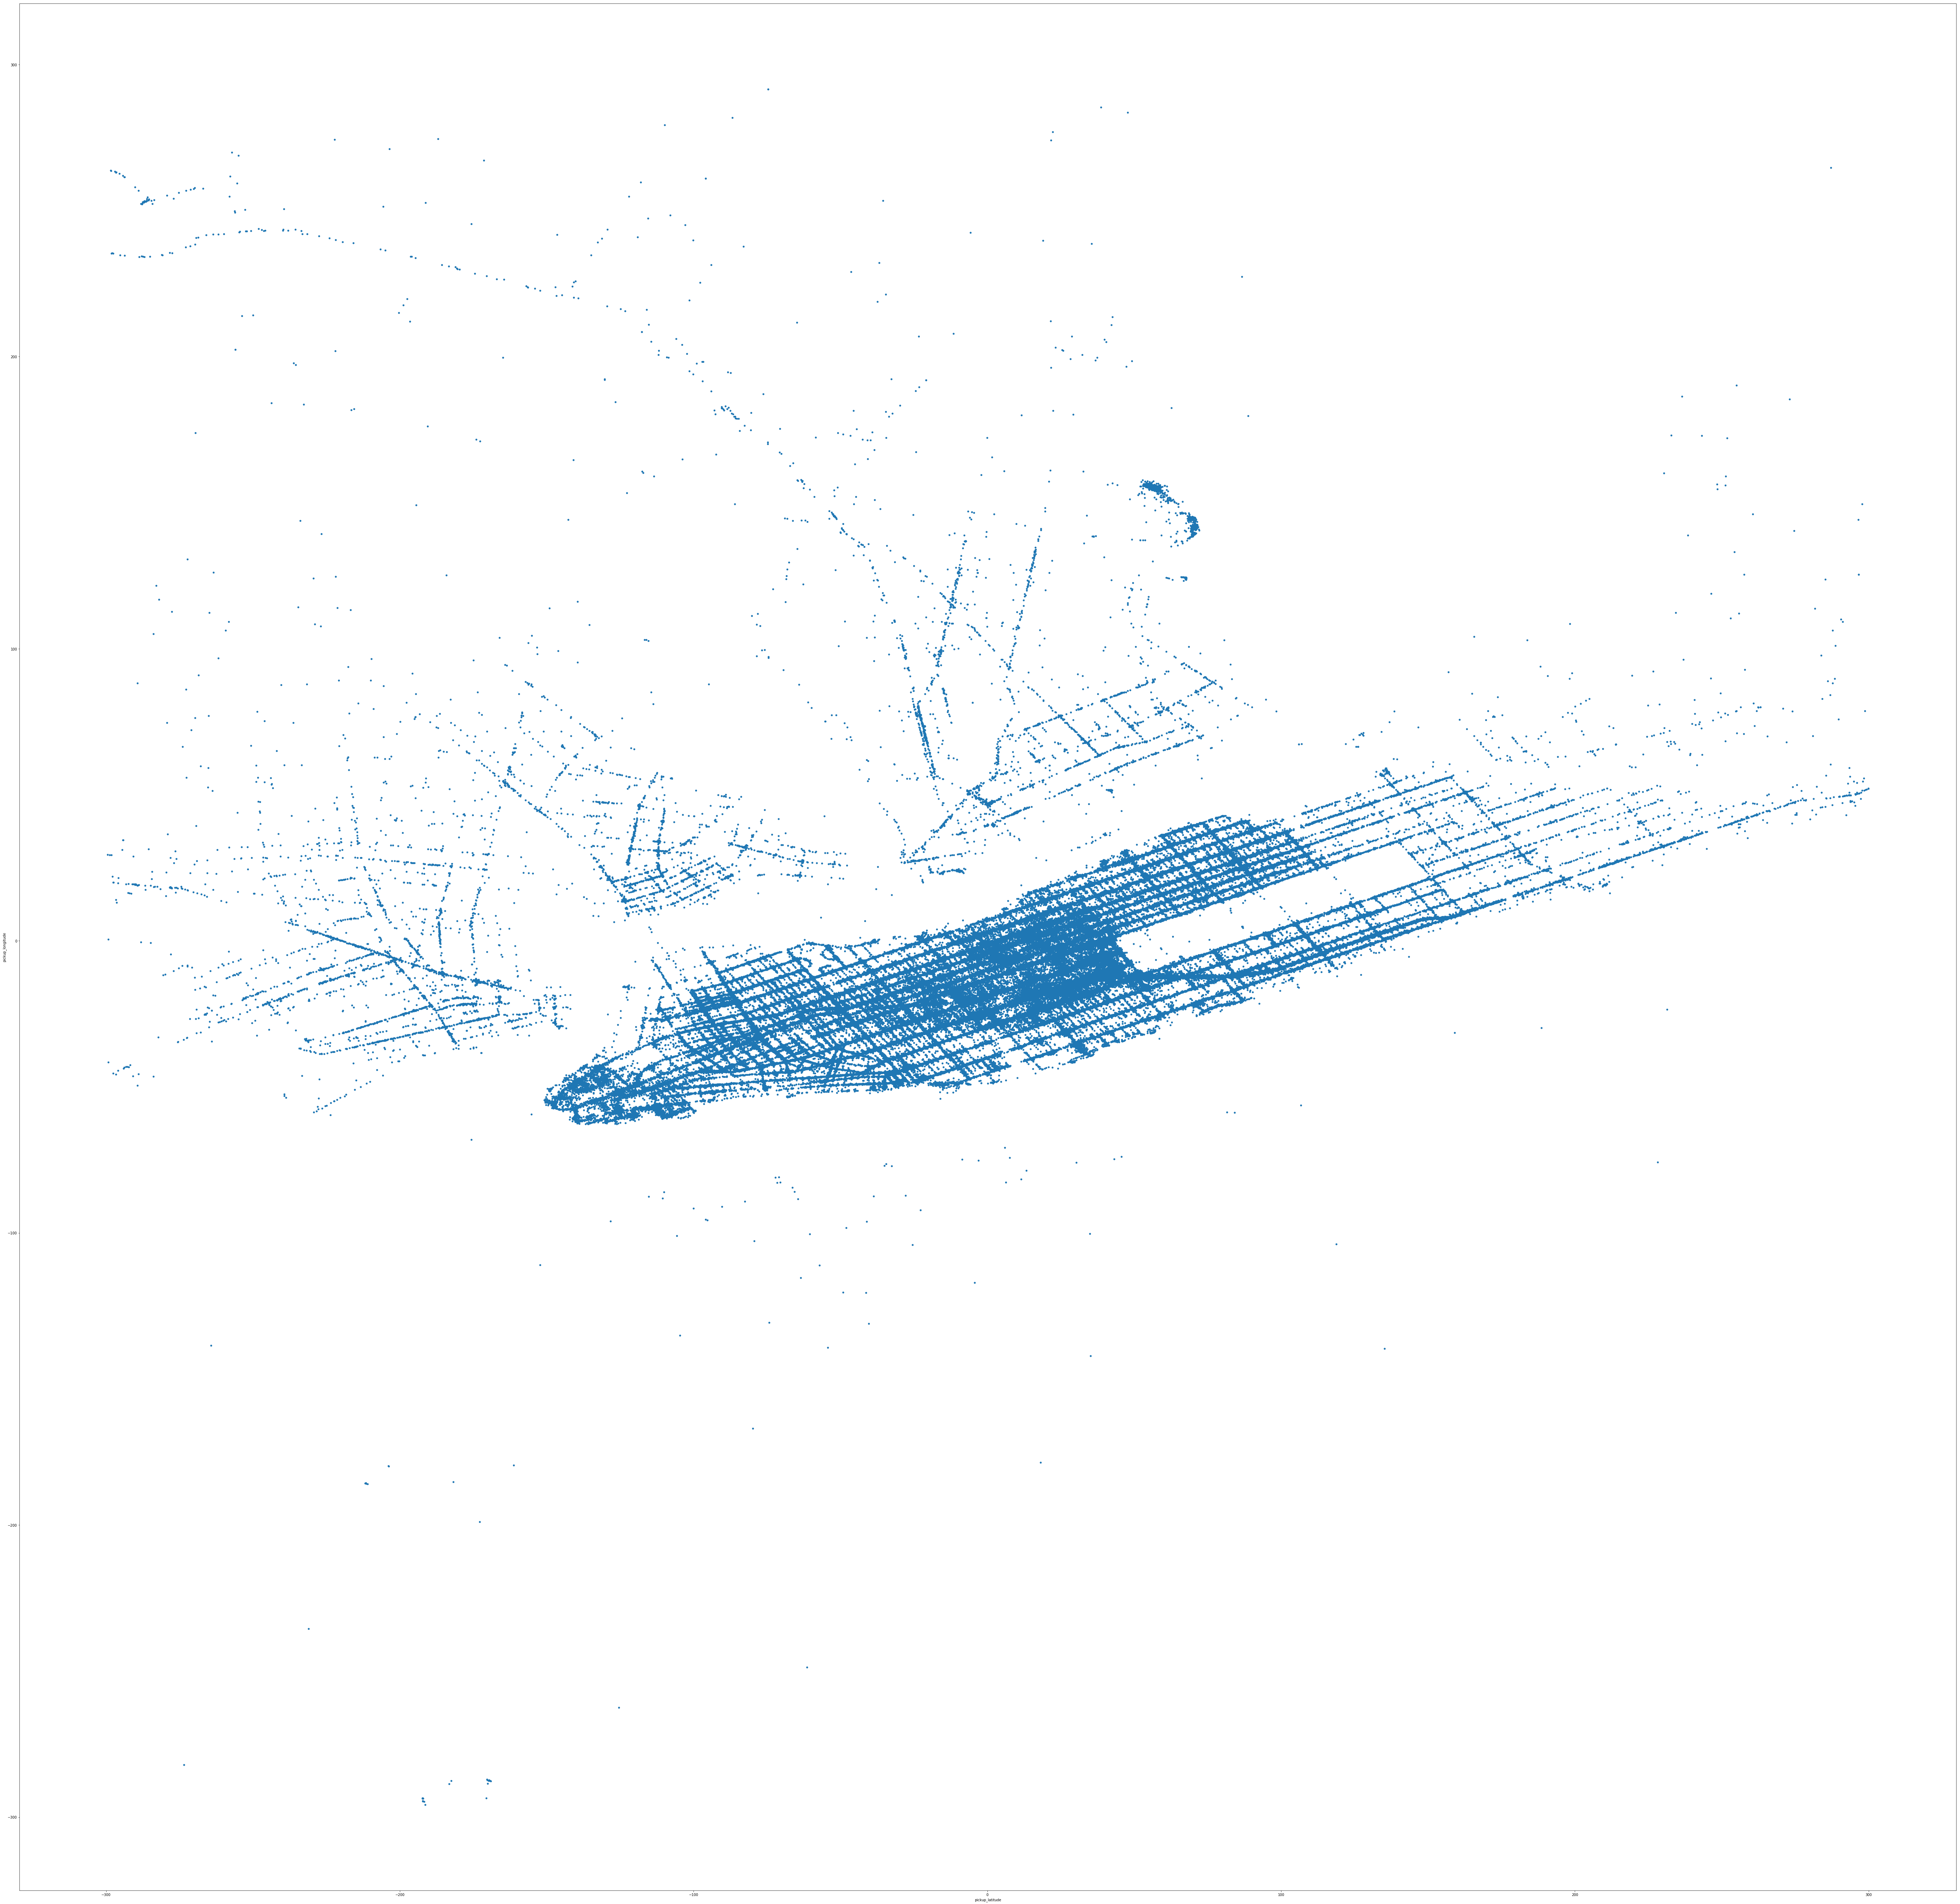

In [13]:
data_friday = new_df["pickup_day"] == 5


In [16]:
friday_df = new_df[data_friday]

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [95]:
prob_mat = np.zeros((600, 600, 24))

for elem in friday_df.values:
    prob_mat[int(elem[0]), int(elem[1]), int(elem[2])] += 1
    
for i in range(0,24):
    prob_mat[:,:,i] /= prob_mat[:,:,i].sum()
    

In [ ]:
windowSize = 0.1 #variable # DECREPIT, LECAGY ONLY
probabilities = []
pointX = -300000.0
pointY = -300000.0
hour = 0
while hour < 24:
    relevant = friday_df["pickup_hour"] == hour
    friday_df_hourly = friday_df[relevant]
    num_of_points = len(friday_df_hourly)
    #print(hour)
    while pointX + windowSize < 300000:
        #print(".")
        pointX += windowSize
        i = 0
        while pointY < 300000:
            i +=1
            pointY += windowSize
            relevant =friday_df_hourly["pickup_latitude"].between( pointX - windowSize, pointX)
            relevant_df = friday_df_hourly[relevant]
            relevant = relevant_df["pickup_longitude"].between(pointY - windowSize, pointY)
            relevant_df = relevant_df[relevant]
            #all within the window  / all the data
            #if len(relevant_df) == 0:
                #pointY += windowSize
                #continue
            num_of_relevant = len(relevant_df)
            probabilities.append(float(num_of_relevant)/float(num_of_points))
        #print(i)
        pointY = -300000
    hour += 1
    pointX = -300000